In [10]:
#use sklearn to generate some fake data
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline
#make it pretty
plt.style.use('ggplot')

In [22]:
x, y, coef = make_regression(
    n_samples = 10,
    n_features = 1,
    n_informative = 1,# the number of features used to build the linaer model
    bias = 10,
    noise = 10,
    coef = True,
    random_state = 0)
print(x)
print(y)
print(coef)

[[ 0.40015721]
 [-0.10321885]
 [ 0.4105985 ]
 [-0.97727788]
 [ 0.97873798]
 [ 0.95008842]
 [ 2.2408932 ]
 [-0.15135721]
 [ 1.86755799]
 [ 1.76405235]]
[  52.48956723   -7.77964105   46.27738121  -53.27149035   92.33225832
   81.47616194  193.20853013    0.76865401  156.04341636  175.11644886]
79.17250380826646


In [19]:
help(make_regression)

Help on function make_regression in module sklearn.datasets.samples_generator:

make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
    Generate a random regression problem.
    
    The input set can either be well conditioned (by default) or have a low
    rank-fat tail singular profile. See :func:`make_low_rank_matrix` for
    more details.
    
    The output is generated by applying a (potentially biased) random linear
    regression model with `n_informative` nonzero regressors to the previously
    generated input and some gaussian centered noise with some adjustable
    scale.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The number of samples.
    
    n_features : int, optional (default=100)
        The number of features.
    
    n_informat

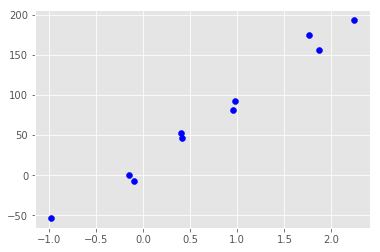

In [18]:
plt.scatter(x,y, color = "blue")

In [26]:
def hypothesis_linreg(X, coeffs):
    '''
    INPUT: 2 dimensional numpy array, numpy array
    OUTPUT: numpy array
    Calculate the hypothesis for the given data with the given coefficients.
    '''
    return X.dot(coeffs)
#get the SSR
def cost_linreg(X, y, coeffs):
    '''
    INPUT: 2 dimensional numpy array, numpy array
    OUTPUT: numpy array

    Calculate the cost for the given data with the given coefficients.
    '''
    y_pred = hypothesis_linreg(X, coeffs)
    return np.sum((y-y_pred)**2)
#guess a coefficient
coeffs = y.mean()/x.mean()
#get the prediction
y_pred = hypothesis_linreg(x, coeffs)

print ("X: ", x)
print ("y: ", y)
print ("y_pred: ", y_pred)
print ("RSS: ", cost_linreg(x, y, coeffs))

X:  [[ 0.40015721]
 [-0.10321885]
 [ 0.4105985 ]
 [-0.97727788]
 [ 0.97873798]
 [ 0.95008842]
 [ 2.2408932 ]
 [-0.15135721]
 [ 1.86755799]
 [ 1.76405235]]
y:  [  52.48956723   -7.77964105   46.27738121  -53.27149035   92.33225832
   81.47616194  193.20853013    0.76865401  156.04341636  175.11644886]
y_pred:  [[  39.94187929]
 [ -10.30283807]
 [  40.9840819 ]
 [ -97.54744959]
 [  97.69319058]
 [  94.83352066]
 [ 223.67580489]
 [ -15.10779068]
 [ 186.41117603]
 [ 176.07971165]]
RSS:  1542165.7186


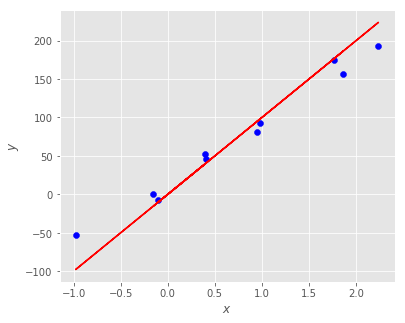

In [29]:
def plot_reg_1d_data(x,y,y_pred, ax):
    ax.scatter(x,y, color = "blue")
    ax.plot(x, y_pred, color = "red")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
fig, ax = plt.subplots(1, figsize = (6,5))
plot_reg_1d_data(x,y, y_pred, ax)